In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

In [4]:
data = fetch_california_housing()
X,y = data.data , data.target

In [5]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
X_train , X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
eda = pd.DataFrame(data=X_train)
eda.columns = data.feature_names
eda['MedHouseVal'] = y_train
eda.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.880754,28.608285,5.435235,1.096685,1426.453004,3.096961,35.643149,-119.582290,2.071947
std,1.904294,12.602499,2.387375,0.433215,1137.056380,11.578744,2.136665,2.005654,1.156226
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.550000,-124.350000,0.149990
25%,2.566700,18.000000,4.452055,1.006508,789.000000,2.428799,33.930000,-121.810000,1.198000
50%,3.545800,29.000000,5.235874,1.049286,1167.000000,2.817240,34.260000,-118.510000,1.798500
75%,4.773175,37.000000,6.061037,1.100348,1726.000000,3.280000,37.720000,-118.010000,2.651250
max,15.000100,52.000000,141.909091,25.636364,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Text(0, 0.5, 'Frequency')

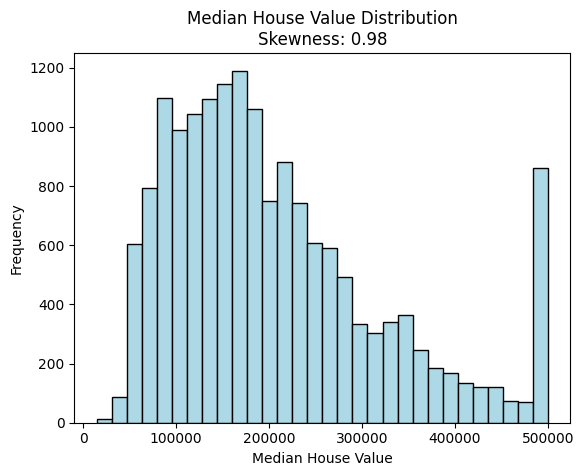

In [8]:
# Plot the distribution
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

In [9]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_test = rf_regressor.predict(X_test)

In [11]:
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.3275
Mean Squared Error (MSE): 0.2554
Root Mean Squared Error (RMSE): 0.5053
R² Score: 0.8051


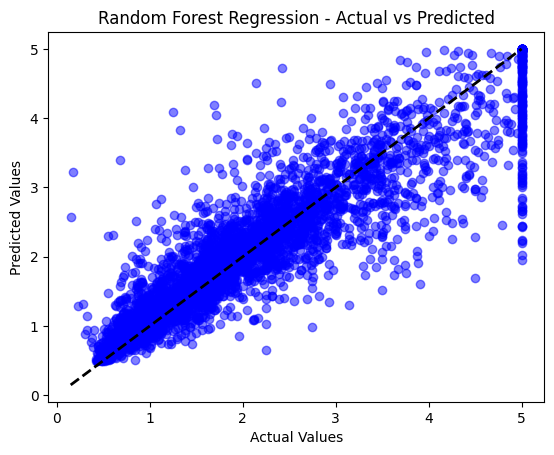

In [12]:
plt.scatter(y_test, y_pred_test, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.show()

Average error = -1242
Standard deviation of error = 50518


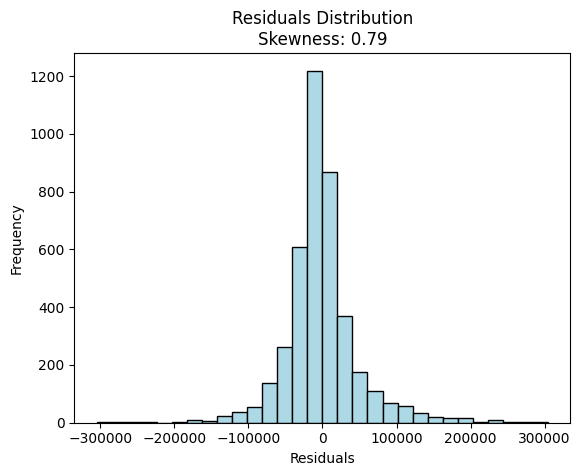

In [16]:
residuals = 1e5*(y_test - y_pred_test)
plt.hist(residuals, bins=30, color='lightblue', edgecolor='black')
plt.title(f'Residuals Distribution\nSkewness: {skew(residuals):.2f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
print('Average error = ' + str(int(np.mean(residuals))))
print('Standard deviation of error = ' + str(int(np.std(residuals))))
plt.show()

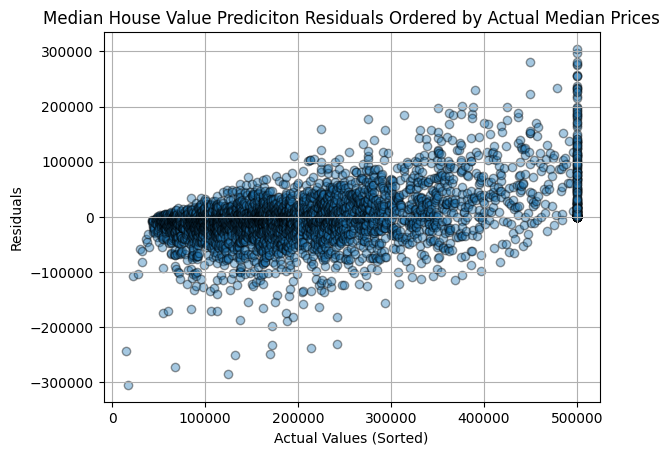

In [18]:
# Enter your code here

# Create a DataFrame to make sorting easy
residuals_df = pd.DataFrame({
    'Actual': 1e5*y_test,
    'Residuals': residuals
})

# Sort the DataFrame by the actual target values
residuals_df = residuals_df.sort_values(by='Actual')

# Plot the residuals
plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], marker='o', alpha=0.4,ec='k')
plt.title('Median House Value Prediciton Residuals Ordered by Actual Median Prices')
plt.xlabel('Actual Values (Sorted)')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

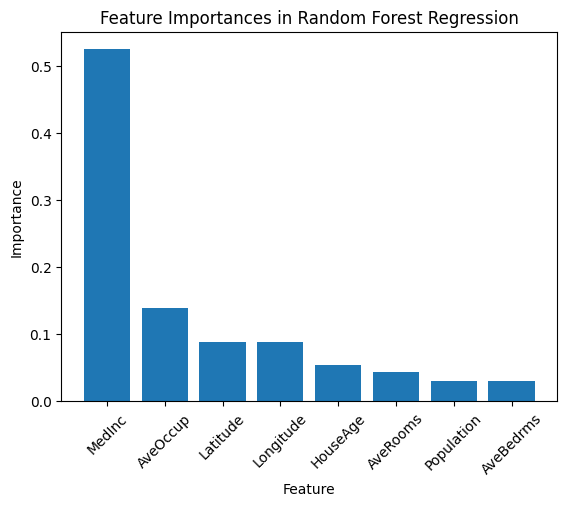

In [19]:
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]
features = data.feature_names

# Plot feature importances
plt.bar(range(X.shape[1]), importances[indices],  align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances in Random Forest Regression")
plt.show()